In [1]:
import pandas as pd

file_path = r'C:\Users\prito\Desktop\project02\data.csv'

df = pd.read_csv(file_path)
df.head()


,Accuracy(%),Avg. Reaction Time(s)
0,83.7,1.32
1,85.1,2.30
2,83.3,2.64
3,97.5,2.35
4,94.1,1.81


In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier


In [6]:
# Function to manually label the data
def label_data(row):
    if row['Accuracy(%)'] > 85 and row['Avg. Reaction Time(s)'] < 2.0:
        return 1  # High accuracy and low reaction time
    else:
        return 0  # Low accuracy and/or high reaction time

# Apply the labeling function to the dataframe
df['Class'] = df.apply(label_data, axis=1)

# Print the first few rows of the dataframe to check the output
print(df.head())  # This will display the dataframe with the new 'Class' column



   Accuracy(%)  Avg. Reaction Time(s)  Class
0         83.7                   1.32      0
1         85.1                   2.30      0
2         83.3                   2.64      0
3         97.5                   2.35      0
4         94.1                   1.81      1


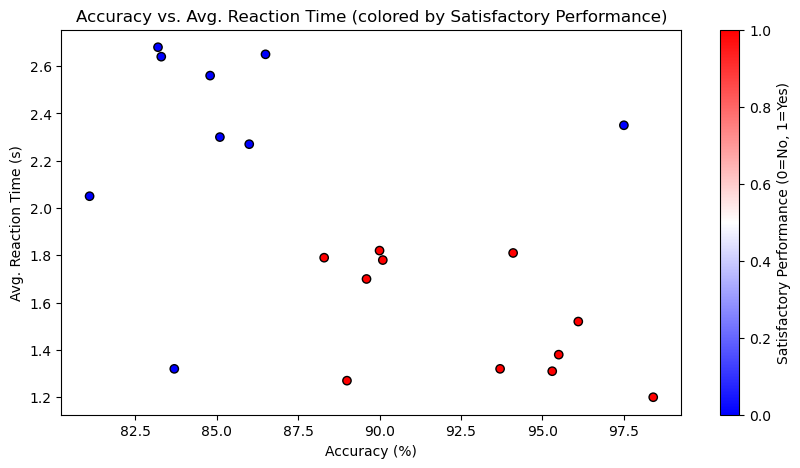

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Accuracy(%)'], df['Avg. Reaction Time(s)'], 
            c=df['Class'], cmap='bwr', edgecolor='k')  # Using 'Class' for color mapping
plt.xlabel('Accuracy (%)')
plt.ylabel('Avg. Reaction Time (s)')
plt.title('Accuracy vs. Avg. Reaction Time (colored by Satisfactory Performance)')
plt.colorbar(label='Satisfactory Performance (0=No, 1=Yes)')  # Color bar reflecting Class 0 and 1
plt.show()


In [12]:
# Step 1: Calculate the statistical features for Accuracy(%) and Avg. Reaction Time(s)

features = {}

# For Accuracy
features['mean_accuracy'] = df['Accuracy(%)'].mean()
features['std_accuracy'] = df['Accuracy(%)'].std()
features['min_accuracy'] = df['Accuracy(%)'].min()
features['max_accuracy'] = df['Accuracy(%)'].max()
features['median_accuracy'] = df['Accuracy(%)'].median()
features['skew_accuracy'] = df['Accuracy(%)'].skew()
features['kurtosis_accuracy'] = df['Accuracy(%)'].kurtosis()
features['25th_percentile_accuracy'] = df['Accuracy(%)'].quantile(0.25)
features['75th_percentile_accuracy'] = df['Accuracy(%)'].quantile(0.75)
features['iqr_accuracy'] = features['75th_percentile_accuracy'] - features['25th_percentile_accuracy']

# For Avg. Reaction Time
features['mean_reaction_time'] = df['Avg. Reaction Time(s)'].mean()
features['std_reaction_time'] = df['Avg. Reaction Time(s)'].std()
features['min_reaction_time'] = df['Avg. Reaction Time(s)'].min()
features['max_reaction_time'] = df['Avg. Reaction Time(s)'].max()
features['median_reaction_time'] = df['Avg. Reaction Time(s)'].median()
features['skew_reaction_time'] = df['Avg. Reaction Time(s)'].skew()
features['kurtosis_reaction_time'] = df['Avg. Reaction Time(s)'].kurtosis()
features['25th_percentile_reaction_time'] = df['Avg. Reaction Time(s)'].quantile(0.25)
features['75th_percentile_reaction_time'] = df['Avg. Reaction Time(s)'].quantile(0.75)
features['iqr_reaction_time'] = features['75th_percentile_reaction_time'] - features['25th_percentile_reaction_time']

# Step 2: Print the statistical features
for key, value in features.items():
    print(f"{key.replace('_', ' ').capitalize()}: {value:.2f}")


Mean accuracy: 89.56
Std accuracy: 5.34
Min accuracy: 81.10
Max accuracy: 98.40
Median accuracy: 89.30
Skew accuracy: 0.17
Kurtosis accuracy: -1.27
25th percentile accuracy: 85.02
75th percentile accuracy: 94.40
Iqr accuracy: 9.38
Mean reaction time: 1.89
Std reaction time: 0.52
Min reaction time: 1.20
Max reaction time: 2.68
Median reaction time: 1.80
Skew reaction time: 0.26
Kurtosis reaction time: -1.38
25th percentile reaction time: 1.36
75th percentile reaction time: 2.31
Iqr reaction time: 0.95


Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



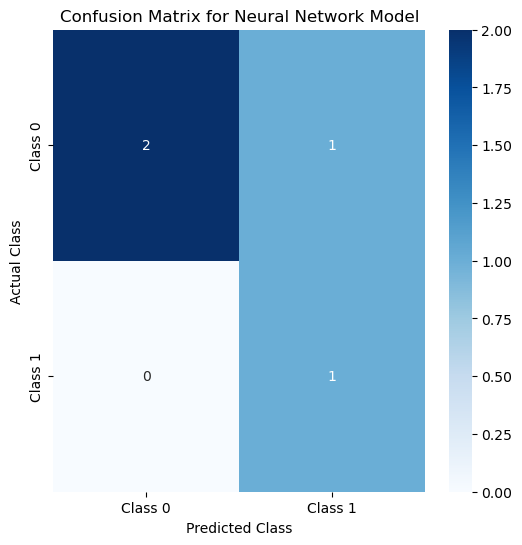

Confusion matrix image saved as 'confusion_matrix_nn.png'.
Accuracy of the Neural Network on the test set: 0.75


In [20]:
#Initialize and train the Neural Network (MLPClassifier)
model_nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)  # Single hidden layer with 10 neurons
model_nn.fit(X_train, y_train)

#Predict on the test set
y_pred_nn = model_nn.predict(X_test)

#Evaluate the Neural Network model

#Print classification report (accuracy, precision, recall, F1 score)
print("Classification Report for Neural Network:")
print(classification_report(y_test, y_pred_nn))

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Neural Network Model')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

# Save the confusion matrix plot as an image
plt.savefig(r'C:\Users\prito\Desktop\project02\confusion_matrix_nn.png')  # Save to Desktop/project02 folder

# Show the confusion matrix plot
plt.show()

print("Confusion matrix image saved as 'confusion_matrix_nn.png'.")

# Step 10: Accuracy on the test set
accuracy_nn = model_nn.score(X_test, y_test)
print(f"Accuracy of the Neural Network on the test set: {accuracy_nn:.2f}")


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



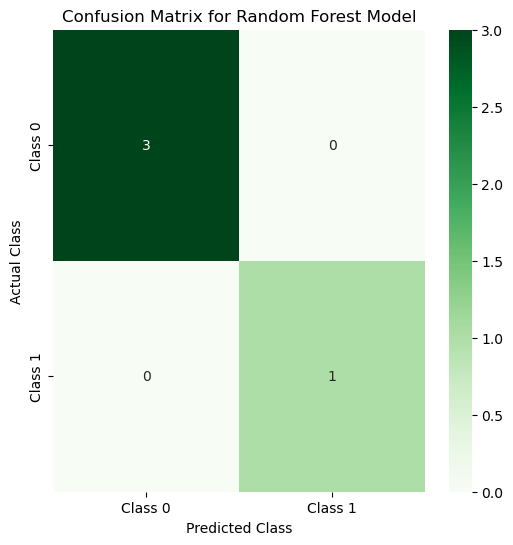

Confusion matrix image saved as 'confusion_matrix_rf.png'.
Accuracy of the Random Forest on the test set: 1.00


In [18]:

 #Initialize and train the Random Forest Classifier
model_rf = RandomForestClassifier(
    n_estimators=200,        # Number of trees in the forest
    max_depth=None,          # No max depth (grow fully)
    min_samples_split=2,     # Minimum samples to split a node
    min_samples_leaf=1,      # Minimum samples per leaf
    random_state=42
)

model_rf.fit(X_train, y_train)

#Predict on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the Random Forest model

# Print classification report (accuracy, precision, recall, F1 score)
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# 9b: Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

# Save the confusion matrix plot as an image
plt.savefig(r'C:\Users\prito\Desktop\project02\confusion_matrix_rf.png')  # Save to Desktop/project02 folder

# Show the confusion matrix plot
plt.show()

print("Confusion matrix image saved as 'confusion_matrix_rf.png'.")

# Step 10: Accuracy on the test set
accuracy_rf = model_rf.score(X_test, y_test)
print(f"Accuracy of the Random Forest on the test set: {accuracy_rf:.2f}")


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



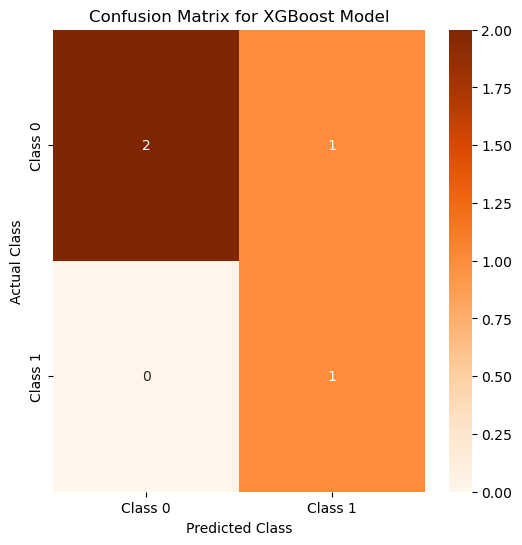

Confusion matrix image saved as 'confusion_matrix_xgb.png'.
Accuracy of the XGBoost on the test set: 0.75


In [25]:

# Initialize and train the XGBoost Classifier (fixed: removed deprecated use_label_encoder)
model_xgb = XGBClassifier(
    n_estimators=200,        # Number of boosting rounds (trees)
    learning_rate=0.1,       # Step size shrinkage
    max_depth=4,             # Depth of trees
    subsample=0.8,           # Row sampling
    colsample_bytree=0.8,    # Feature sampling
    random_state=42,
    eval_metric='logloss'    # Prevents warning
)

model_xgb.fit(X_train, y_train)

#Predict on the test set
y_pred_xgb = model_xgb.predict(X_test)

#Print classification report
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb, zero_division=0))

#Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for XGBoost Model')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

# Save the confusion matrix plot as an image
plt.savefig(r'C:\Users\prito\Desktop\project02\confusion_matrix_xgb.png')

# Show the confusion matrix
plt.show()

print("Confusion matrix image saved as 'confusion_matrix_xgb.png'.")

# Step 10: Accuracy on the test set
accuracy_xgb = model_xgb.score(X_test, y_test)
print(f"Accuracy of the XGBoost on the test set: {accuracy_xgb:.2f}")
